In [295]:
import pandas as pd 
import seaborn as sns 
import matplotlib as plt

In [296]:
mydatabase = pd.read_csv('forestfires.csv');

In [341]:
mydatabase

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,y
0,7,5,mar,fri,49.9,2.54,12.76,0.46,4.04,16.8,0.80,0.00,0.000,2.0
1,7,4,oct,tue,49.9,2.54,12.76,0.46,4.04,16.8,0.80,0.00,0.000,2.0
2,7,4,oct,sat,49.9,2.54,12.76,0.46,4.04,16.8,0.80,0.00,0.000,2.0
3,8,6,mar,fri,49.9,2.54,12.76,0.46,4.04,16.8,0.80,0.00,0.000,2.0
4,8,6,mar,sun,49.9,2.54,12.76,0.46,4.04,16.8,0.80,0.00,0.000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,96.1,288.42,851.84,20.96,32.14,93.4,8.94,0.64,214.918,8.8
513,2,4,aug,sun,96.1,288.42,851.84,20.96,32.14,93.4,8.94,0.64,214.918,8.8
514,7,4,aug,sun,96.1,288.42,851.84,20.96,32.14,93.4,8.94,0.64,214.918,8.8
515,1,4,aug,sat,94.4,146.00,614.70,11.30,25.60,42.0,4.00,0.00,0.000,4.0


In [298]:
 mydatabase.isnull().any()
#Cheack if any Value is NaN in Varibles


X        False
Y        False
month    False
day      False
FFMC     False
DMC      False
DC       False
ISI      False
temp     False
RH       False
wind     False
rain     False
area     False
dtype: bool

In [299]:
mydatabase.dtypes
#Data Type for each Varible in dataframe

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [300]:
frequencytable = pd.crosstab(index=mydatabase['month'], columns='count')
#frequency table of month varible 
frequencytable

col_0,count
month,
apr,9
aug,184
dec,9
feb,20
jan,2
jul,32
jun,17
mar,54
may,2


In [301]:
 proportion = frequencytable/frequencytable['count'].sum()
# Frequency Table In Proportion  

In [302]:
 proportion * 100

col_0,count
month,
apr,1.740812
aug,35.589942
dec,1.740812
feb,3.868472
jan,0.386847
jul,6.189555
jun,3.288201
mar,10.444874
may,0.386847


In [303]:
numricvarible = mydatabase.iloc[0 : 517 , 4 :13 ]
numricvarible["X"] = mydatabase["X"]
numricvarible["y"] = mydatabase["Y"]
numricvarible

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,X,y
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,7,5
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,7,4
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,7,4
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,8,6
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,8,6
...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,4,3
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,2,4
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,7,4
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1,4


<AxesSubplot:>

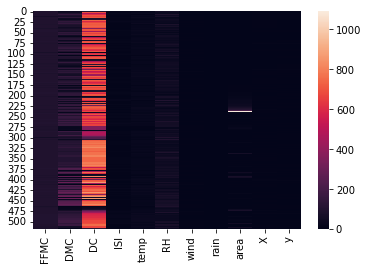

In [304]:
#heatmap for numric value in dataset to better visualize 
sns.heatmap(numricvarible)

<AxesSubplot:>

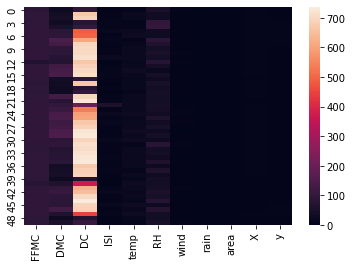

In [305]:
#for clear view i will reduce the row in each column 
numricvarible.iloc[0:50 , 0 : 11]
sns.heatmap(numricvarible.iloc[0:50 , 0 : 11])

In [306]:
# The nosiy data bigger than upper fence (Q3 + (1.5 * IQR))
# The nosiy data smaller than lower fence (Q1-(1.5*IQR))
if ((mydatabase['X'] > 13).all() or (mydatabase['X'] < -3 ).all()) :
    print("you have a noisy  ")
else:
    print("dont have a noisy")

dont have a noisy


In [307]:
col = numricvarible.columns

In [308]:
col

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'X',
       'y'],
      dtype='object')

In [309]:
numricvarible


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,X,y
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,7,5
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,7,4
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,7,4
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,8,6
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,8,6
...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,4,3
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,2,4
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,7,4
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1,4


In [310]:
# After we made sure that there is noisy data in this 
#variable and based on the information given about the average values 
#that should be in this variable , we need smooth data in it .

In [311]:
sortedcol = numricvarible["FFMC"].sort_values()
sortedcol

379    18.7
312    50.4
299    53.4
199    63.5
12     63.5
       ... 
497    96.1
500    96.1
501    96.1
496    96.2
495    96.2
Name: FFMC, Length: 517, dtype: float64

In [312]:
for bin_number in range(103):
    start_index = bin_number * 5
    end_index = start_index + 5
    mean =sortedcol[start_index:end_index].mean()
    numricvarible["FFMC"][start_index:end_index] = mean #replacement for orginal values
    print('Bin number',bin_number,'has mean of',mean)
    
mydatabase["FFMC"] = numricvarible["FFMC"]

C:\Users\IMOE001\AppData\Local\Temp/ipykernel_6224/3638868006.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numricvarible["FFMC"][start_index:end_index] = mean #replacement for orginal values


Bin number 0 has mean of 49.9
Bin number 1 has mean of 73.38
Bin number 2 has mean of 80.72
Bin number 3 has mean of 81.75999999999999
Bin number 4 has mean of 83.76
Bin number 5 has mean of 84.23999999999998
Bin number 6 has mean of 84.53999999999999
Bin number 7 has mean of 84.82000000000001
Bin number 8 has mean of 85.12
Bin number 9 has mean of 85.44000000000001
Bin number 10 has mean of 86.02000000000001
Bin number 11 has mean of 86.8
Bin number 12 has mean of 87.34
Bin number 13 has mean of 87.66
Bin number 14 has mean of 88.04
Bin number 15 has mean of 88.17999999999999
Bin number 16 has mean of 88.64
Bin number 17 has mean of 88.97999999999999
Bin number 18 has mean of 89.3
Bin number 19 has mean of 89.52000000000001
Bin number 20 has mean of 89.67999999999999
Bin number 21 has mean of 89.97999999999999
Bin number 22 has mean of 90.1
Bin number 23 has mean of 90.1
Bin number 24 has mean of 90.2
Bin number 25 has mean of 90.2
Bin number 26 has mean of 90.26
Bin number 27 has mea

In [313]:
sortedcol = numricvarible["DMC"].sort_values()
for bin_number in range(103):
    start_index=bin_number*5
    end_index=start_index+5
    mean =sortedcol[start_index:end_index].mean()
    numricvarible["DMC"][start_index:end_index] = mean #replacement for orginal values
    print('Bin number',bin_number,'has mean of ',mean)
    
mydatabase["DMC"] = numricvarible["DMC"]

Bin number 0 has mean of  2.54
Bin number 1 has mean of  4.140000000000001
Bin number 2 has mean of  6.720000000000001
Bin number 3 has mean of  8.82
Bin number 4 has mean of  11.96
Bin number 5 has mean of  15.5
Bin number 6 has mean of  18.04
Bin number 7 has mean of  20.0
Bin number 8 has mean of  24.28
Bin number 9 has mean of  25.4
Bin number 10 has mean of  25.8
Bin number 11 has mean of  27.04
Bin number 12 has mean of  29.439999999999998
Bin number 13 has mean of  33.2
Bin number 14 has mean of  35.64
Bin number 15 has mean of  36.16
Bin number 16 has mean of  38.98
Bin number 17 has mean of  42.1
Bin number 18 has mean of  45.38
Bin number 19 has mean of  47.86
Bin number 20 has mean of  48.86
Bin number 21 has mean of  50.8
Bin number 22 has mean of  51.48
Bin number 23 has mean of  52.42
Bin number 24 has mean of  56.339999999999996
Bin number 25 has mean of  61.85999999999999
Bin number 26 has mean of  71.1
Bin number 27 has mean of  74.16
Bin number 28 has mean of  77.62
B

C:\Users\IMOE001\AppData\Local\Temp/ipykernel_6224/2437049933.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numricvarible["DMC"][start_index:end_index] = mean #replacement for orginal values


 30 has mean of  82.05999999999999
Bin number 31 has mean of  83.97999999999999
Bin number 32 has mean of  85.03999999999999
Bin number 33 has mean of  85.22
Bin number 34 has mean of  87.94
Bin number 35 has mean of  88.97999999999999
Bin number 36 has mean of  90.34
Bin number 37 has mean of  91.66
Bin number 38 has mean of  93.38
Bin number 39 has mean of  95.05999999999999
Bin number 40 has mean of  96.41999999999999
Bin number 41 has mean of  97.1
Bin number 42 has mean of  99.0
Bin number 43 has mean of  99.0
Bin number 44 has mean of  99.6
Bin number 45 has mean of  100.17999999999999
Bin number 46 has mean of  101.88000000000001
Bin number 47 has mean of  102.47999999999999
Bin number 48 has mean of  103.85999999999999
Bin number 49 has mean of  104.84
Bin number 50 has mean of  107.17999999999999
Bin number 51 has mean of  108.3
Bin number 52 has mean of  108.38
Bin number 53 has mean of  109.06000000000002
Bin number 54 has mean of  111.2
Bin number 55 has mean of  111.6
Bin 

In [314]:
sortedcol = numricvarible["DC"].sort_values()
sortedcol
for bin_number in range(103):
    start_index=bin_number*5
    end_index=start_index+5
    mean = sortedcol[start_index:end_index].mean()
    numricvarible["DC"][start_index:end_index] = mean #replacement for orginal values
    print('Bin number',bin_number,'has mean of ',mean)

    
mydatabase["DC"] = numricvarible["DC"]


Bin number 0 has mean of  12.76
Bin number 1 has mean of  20.459999999999997
Bin number 2 has mean of  27.8
Bin number 3 has mean of  32.84
Bin number 4 has mean of  42.44
Bin number 5 has mean of  46.980000000000004
Bin number 6 has mean of  55.459999999999994
Bin number 7 has mean of  60.459999999999994
Bin number 8 has mean of  68.24
Bin number 9 has mean of  76.1
Bin number 10 has mean of  80.14000000000001
Bin number 11 has mean of  82.28
Bin number 12 has mean of  86.72
Bin number 13 has mean of  94.20000000000002
Bin number 14 has mean of  99.41999999999999
Bin number 15 has mean of  102.2
Bin number 16 has mean of  103.8
Bin number 17 has mean of  164.18
Bin number 18 has mean of  248.28000000000003
Bin number 19 has mean of  296.12
Bin number 20 has mean of  317.56
Bin number 21 has mean of  349.8
Bin number 22 has mean of  353.23999999999995
Bin number 23 has mean of  368.80000000000007
Bin number 24 has mean of  415.53999999999996
Bin number 25 has mean of  432.84
Bin number

C:\Users\IMOE001\AppData\Local\Temp/ipykernel_6224/145460590.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numricvarible["DC"][start_index:end_index] = mean #replacement for orginal values


 35 has mean of  590.5
Bin number 36 has mean of  597.5
Bin number 37 has mean of  601.4
Bin number 38 has mean of  604.8199999999999
Bin number 39 has mean of  607.0199999999999
Bin number 40 has mean of  611.36
Bin number 41 has mean of  613.9
Bin number 42 has mean of  621.78
Bin number 43 has mean of  627.9799999999999
Bin number 44 has mean of  631.6800000000001
Bin number 45 has mean of  636.6
Bin number 46 has mean of  644.64
Bin number 47 has mean of  647.1
Bin number 48 has mean of  653.26
Bin number 49 has mean of  656.5600000000001
Bin number 50 has mean of  659.4399999999999
Bin number 51 has mean of  662.6600000000001
Bin number 52 has mean of  664.82
Bin number 53 has mean of  665.82
Bin number 54 has mean of  666.96
Bin number 55 has mean of  668.0
Bin number 56 has mean of  670.36
Bin number 57 has mean of  671.48
Bin number 58 has mean of  672.4599999999999
Bin number 59 has mean of  674.1600000000001
Bin number 60 has mean of  678.18
Bin number 61 has mean of  682.76


In [315]:
sortedcol = numricvarible["ISI"].sort_values()
sortedcol
for bin_number in range(103):
    start_index=bin_number*5
    end_index=start_index+5
    mean = sortedcol[start_index:end_index].mean()
    numricvarible["ISI"][start_index:end_index] = mean #replacement for orginal values
    print('Bin number',bin_number,'has mean of ',mean)
    
mydatabase["ISI"] = numricvarible["ISI"]


Bin number 0 has mean of  0.45999999999999996
Bin number 1 has mean of  1.2
Bin number 2 has mean of  1.9
Bin number 3 has mean of  2.06
Bin number 4 has mean of  2.54
Bin number 5 has mean of  2.66
Bin number 6 has mean of  2.88
Bin number 7 has mean of  3.1199999999999997
Bin number 8 has mean of  3.38
Bin number 9 has mean of  3.7
Bin number 10 has mean of  3.84
Bin number 11 has mean of  4.08
Bin number 12 has mean of  4.82
Bin number 13 has mean of  5.0
Bin number 14 has mean of  5.159999999999999
Bin number 15 has mean of  5.359999999999999
Bin number 16 has mean of  5.619999999999999
Bin number 17 has mean of  5.76
Bin number 18 has mean of  6.2
Bin number 19 has mean of  6.2
Bin number 20 has mean of  6.2
Bin number 21 has mean of  6.28
Bin number 22 has mean of  6.3
Bin number 23 has mean of  6.3
Bin number 24 has mean of  6.3
Bin number 25 has mean of  6.4
Bin number 26 has mean of  6.5600000000000005
Bin number 27 has mean of  6.720000000000001
Bin number 28 has mean of  6.8

C:\Users\IMOE001\AppData\Local\Temp/ipykernel_6224/3449393708.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numricvarible["ISI"][start_index:end_index] = mean #replacement for orginal values


Bin number 31 has mean of  7.0
Bin number 32 has mean of  7.0600000000000005
Bin number 33 has mean of  7.1
Bin number 34 has mean of  7.1
Bin number 35 has mean of  7.1
Bin number 36 has mean of  7.139999999999999
Bin number 37 has mean of  7.260000000000001
Bin number 38 has mean of  7.44
Bin number 39 has mean of  7.5
Bin number 40 has mean of  7.5
Bin number 41 has mean of  7.5600000000000005
Bin number 42 has mean of  7.659999999999999
Bin number 43 has mean of  7.76
Bin number 44 has mean of  7.8
Bin number 45 has mean of  7.82
Bin number 46 has mean of  8.02
Bin number 47 has mean of  8.1
Bin number 48 has mean of  8.1
Bin number 49 has mean of  8.179999999999998
Bin number 50 has mean of  8.379999999999999
Bin number 51 has mean of  8.4
Bin number 52 has mean of  8.4
Bin number 53 has mean of  8.440000000000001
Bin number 54 has mean of  8.5
Bin number 55 has mean of  8.56
Bin number 56 has mean of  8.62
Bin number 57 has mean of  8.780000000000001
Bin number 58 has mean of  8.

In [316]:
sortedcol = numricvarible["temp"].sort_values()
sortedcol
for bin_number in range(103):
    start_index=bin_number*5
    end_index=start_index+5
    mean = sortedcol[start_index:end_index].mean()
    numricvarible["temp"][start_index:end_index] = mean #replacement for orginal values
    print('Bin number',bin_number,'has mean of ',mean)
    
mydatabase["temp"] = numricvarible["temp"]


Bin number 0 has mean of  4.04
Bin number 1 has mean of  4.739999999999999
Bin number 2 has mean of  5.119999999999999
Bin number 3 has mean of  5.4399999999999995
Bin number 4 has mean of  7.1
Bin number 5 has mean of  8.34
Bin number 6 has mean of  8.959999999999999
Bin number 7 has mean of  10.059999999999999
Bin number 8 has mean of  10.42
Bin number 9 has mean of  10.82
Bin number 10 has mean of  11.179999999999998
Bin number 11 has mean of  11.440000000000001
Bin number 12 has mean of  11.66
Bin number 13 has mean of  12.059999999999999
Bin number 14 has mean of  12.5
Bin number 15 has mean of  12.879999999999999
Bin number 16 has mean of  13.319999999999999
Bin number 17 has mean of  13.739999999999998
Bin number 18 has mean of  13.88
Bin number 19 has mean of  14.180000000000001
Bin number 20 has mean of  14.38
Bin number 21 has mean of  14.66
Bin number 22 has mean of  14.919999999999998
Bin number 23 has mean of  15.2
Bin number 24 has mean of  15.36
Bin number 25 has mean of

C:\Users\IMOE001\AppData\Local\Temp/ipykernel_6224/1832707405.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numricvarible["temp"][start_index:end_index] = mean #replacement for orginal values


Bin number 45 has mean of  18.560000000000002
Bin number 46 has mean of  18.7
Bin number 47 has mean of  18.860000000000003
Bin number 48 has mean of  18.939999999999998
Bin number 49 has mean of  19.080000000000002
Bin number 50 has mean of  19.160000000000004
Bin number 51 has mean of  19.279999999999998
Bin number 52 has mean of  19.360000000000003
Bin number 53 has mean of  19.48
Bin number 54 has mean of  19.6
Bin number 55 has mean of  19.660000000000004
Bin number 56 has mean of  19.82
Bin number 57 has mean of  20.060000000000002
Bin number 58 has mean of  20.160000000000004
Bin number 59 has mean of  20.32
Bin number 60 has mean of  20.4
Bin number 61 has mean of  20.560000000000002
Bin number 62 has mean of  20.62
Bin number 63 has mean of  20.7
Bin number 64 has mean of  20.8
Bin number 65 has mean of  20.919999999999998
Bin number 66 has mean of  21.080000000000002
Bin number 67 has mean of  21.22
Bin number 68 has mean of  21.340000000000003
Bin number 69 has mean of  21.4

In [317]:

sortedcol = numricvarible["RH"].sort_values()
sortedcol
for bin_number in range(103):
    start_index=bin_number*5
    end_index=start_index+5
    mean = sortedcol[start_index:end_index].mean()
    numricvarible["RH"][start_index:end_index] = mean #replacement for orginal values
    print('Bin number',bin_number,'has mean of ',mean)
    
mydatabase["RH"] = numricvarible["RH"]


Bin number 0 has mean of  16.8
Bin number 1 has mean of  19.6
Bin number 2 has mean of  21.0
Bin number 3 has mean of  21.8
Bin number 4 has mean of  23.6
Bin number 5 has mean of  24.0
Bin number 6 has mean of  24.2
Bin number 7 has mean of  25.0
Bin number 8 has mean of  25.2
Bin number 9 has mean of  26.0
Bin number 10 has mean of  27.0
Bin number 11 has mean of  27.0
Bin number 12 has mean of  27.0
Bin number 13 has mean of  27.0
Bin number 14 has mean of  27.0
Bin number 15 has mean of  27.0
Bin number 16 has mean of  27.4
Bin number 17 has mean of  28.0
Bin number 18 has mean of  28.2
Bin number 19 has mean of  29.0
Bin number 20 has mean of  29.4
Bin number 21 has mean of  30.0
Bin number 22 has mean of  31.0
Bin number 23 has mean of  31.6
Bin number 24 has mean of  32.0
Bin number 25 has mean of  32.2
Bin number 26 has mean of  33.0
Bin number 27 has mean of  33.0
Bin number 28 has mean of  33.2
Bin number 29 has mean of  34.0
Bin number 30 has mean of  34.0
Bin number 31 has 

C:\Users\IMOE001\AppData\Local\Temp/ipykernel_6224/2738943709.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numricvarible["RH"][start_index:end_index] = mean #replacement for orginal values


In [318]:
sortedcol = numricvarible["wind"].sort_values()
sortedcol
for bin_number in range(103):
    start_index=bin_number*5
    end_index=start_index+5
    mean = sortedcol[start_index:end_index].mean()
    numricvarible["wind"][start_index:end_index] = mean #replacement for orginal values
    print('Bin number',bin_number,'has mean of ',mean)
    
mydatabase["wind"] = numricvarible["wind"]


Bin number 0 has mean of  0.8
Bin number 1 has mean of  0.9
Bin number 2 has mean of  0.9800000000000001
Bin number 3 has mean of  1.3
Bin number 4 has mean of  1.3
Bin number 5 has mean of  1.5
Bin number 6 has mean of  1.8
Bin number 7 has mean of  1.8
Bin number 8 has mean of  1.8
Bin number 9 has mean of  1.8
Bin number 10 has mean of  1.8
Bin number 11 has mean of  1.8800000000000001
Bin number 12 has mean of  2.2
Bin number 13 has mean of  2.2
Bin number 14 has mean of  2.2
Bin number 15 has mean of  2.2
Bin number 16 has mean of  2.2
Bin number 17 has mean of  2.2
Bin number 18 has mean of  2.2
Bin number 19 has mean of  2.2
Bin number 20 has mean of  2.2
Bin number 21 has mean of  2.2
Bin number 22 has mean of  2.5
Bin number 23 has mean of  2.7
Bin number 24 has mean of  2.7
Bin number 25 has mean of  2.7
Bin number 26 has mean of  2.7
Bin number 27 has mean of  2.7
Bin number 28 has mean of  2.7
Bin number 29 has mean of  2.7
Bin number 30 has mean of  2.7
Bin number 31 has m

C:\Users\IMOE001\AppData\Local\Temp/ipykernel_6224/873736964.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numricvarible["wind"][start_index:end_index] = mean #replacement for orginal values


 70 has mean of  4.9
Bin number 71 has mean of  4.9
Bin number 72 has mean of  4.9
Bin number 73 has mean of  4.9
Bin number 74 has mean of  4.9
Bin number 75 has mean of  4.9
Bin number 76 has mean of  4.9
Bin number 77 has mean of  5.0
Bin number 78 has mean of  5.4
Bin number 79 has mean of  5.4
Bin number 80 has mean of  5.4
Bin number 81 has mean of  5.4
Bin number 82 has mean of  5.4
Bin number 83 has mean of  5.4
Bin number 84 has mean of  5.4
Bin number 85 has mean of  5.4
Bin number 86 has mean of  5.8
Bin number 87 has mean of  5.8
Bin number 88 has mean of  5.8
Bin number 89 has mean of  5.8
Bin number 90 has mean of  5.9
Bin number 91 has mean of  6.3
Bin number 92 has mean of  6.3
Bin number 93 has mean of  6.3
Bin number 94 has mean of  6.459999999999999
Bin number 95 has mean of  6.7
Bin number 96 has mean of  7.1
Bin number 97 has mean of  7.6
Bin number 98 has mean of  7.6
Bin number 99 has mean of  7.68
Bin number 100 has mean of  8.1
Bin number 101 has mean of  8.5
B

In [319]:
sortedcol = numricvarible["rain"].sort_values()
sortedcol
for bin_number in range(103):
    start_index=bin_number*5
    end_index=start_index+5
    mean = sortedcol[start_index:end_index].mean()
    numricvarible["rain"][start_index:end_index] = mean #replacement for orginal values
    print('Bin number',bin_number,'has mean of ',mean)
    
mydatabase["rain"] = numricvarible["rain"]



Bin number 0 has mean of  0.0
Bin number 1 has mean of  0.0
Bin number 2 has mean of  0.0
Bin number 3 has mean of  0.0
Bin number 4 has mean of  0.0
Bin number 5 has mean of  0.0
Bin number 6 has mean of  0.0
Bin number 7 has mean of  0.0
Bin number 8 has mean of  0.0
Bin number 9 has mean of  0.0
Bin number 10 has mean of  0.0
Bin number 11 has mean of  0.0
Bin number 12 has mean of  0.0
Bin number 13 has mean of  0.0
Bin number 14 has mean of  0.0
Bin number 15 has mean of  0.0
Bin number 16 has mean of  0.0
Bin number 17 has mean of  0.0
Bin number 18 has mean of  0.0
Bin number 19 has mean of  0.0
Bin number 20 has mean of  0.0
Bin number 21 has mean of  0.0
Bin number 22 has mean of  0.0
Bin number 23 has mean of  0.0
Bin number 24 has mean of  0.0
Bin number 25 has mean of  0.0
Bin number 26 has mean of  0.0
Bin number 27 has mean of  0.0
Bin number 28 has mean of  0.0
Bin number 29 has mean of  0.0
Bin number 30 has mean of  0.0
Bin number 31 has mean of  0.0
Bin number 32 has 

C:\Users\IMOE001\AppData\Local\Temp/ipykernel_6224/3162877323.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numricvarible["rain"][start_index:end_index] = mean #replacement for orginal values


Bin number 68 has mean of  0.0
Bin number 69 has mean of  0.0
Bin number 70 has mean of  0.0
Bin number 71 has mean of  0.0
Bin number 72 has mean of  0.0
Bin number 73 has mean of  0.0
Bin number 74 has mean of  0.0
Bin number 75 has mean of  0.0
Bin number 76 has mean of  0.0
Bin number 77 has mean of  0.0
Bin number 78 has mean of  0.0
Bin number 79 has mean of  0.0
Bin number 80 has mean of  0.0
Bin number 81 has mean of  0.0
Bin number 82 has mean of  0.0
Bin number 83 has mean of  0.0
Bin number 84 has mean of  0.0
Bin number 85 has mean of  0.0
Bin number 86 has mean of  0.0
Bin number 87 has mean of  0.0
Bin number 88 has mean of  0.0
Bin number 89 has mean of  0.0
Bin number 90 has mean of  0.0
Bin number 91 has mean of  0.0
Bin number 92 has mean of  0.0
Bin number 93 has mean of  0.0
Bin number 94 has mean of  0.0
Bin number 95 has mean of  0.0
Bin number 96 has mean of  0.0
Bin number 97 has mean of  0.0
Bin number 98 has mean of  0.0
Bin number 99 has mean of  0.0
Bin numb

In [320]:
sortedcol = numricvarible["area"].sort_values()
sortedcol
for bin_number in range(103):
    start_index=bin_number*5
    end_index=start_index+5
    mean = sortedcol[start_index:end_index].mean()
    numricvarible["area"][start_index:end_index] = mean #replacement for orginal values
    print('Bin number',bin_number,'has mean of ',mean)
    
mydatabase["area"] = numricvarible["area"]


Bin number 0 has mean of  0.0
Bin number 1 has mean of  0.0
Bin number 2 has mean of  0.0
Bin number 3 has mean of  0.0
Bin number 4 has mean of  0.0
Bin number 5 has mean of  0.0
Bin number 6 has mean of  0.0
Bin number 7 has mean of  0.0
Bin number 8 has mean of  0.0
Bin number 9 has mean of  0.0
Bin number 10 has mean of  0.0
Bin number 11 has mean of  0.0
Bin number 12 has mean of  0.0
Bin number 13 has mean of  0.0
Bin number 14 has mean of  0.0
Bin number 15 has mean of  0.0
Bin number 16 has mean of  0.0
Bin number 17 has mean of  0.0
Bin number 18 has mean of  0.0
Bin number 19 has mean of  0.0
Bin number 20 has mean of  0.0
Bin number 21 has mean of  0.0
Bin number 22 has mean of  0.0
Bin number 23 has mean of  0.0
Bin number 24 has mean of  0.0
Bin number 25 has mean of  0.0
Bin number 26 has mean of  0.0
Bin number 27 has mean of  0.0
Bin number 28 has mean of  0.0
Bin number 29 has mean of  0.0
Bin number 30 has mean of  0.0
Bin number 31 has mean of  0.0
Bin number 32 has 

C:\Users\IMOE001\AppData\Local\Temp/ipykernel_6224/1073651523.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numricvarible["area"][start_index:end_index] = mean #replacement for orginal values


 72 has mean of  4.75
Bin number 73 has mean of  5.216
Bin number 74 has mean of  5.566000000000001
Bin number 75 has mean of  5.959999999999999
Bin number 76 has mean of  6.38
Bin number 77 has mean of  6.548
Bin number 78 has mean of  6.938
Bin number 79 has mean of  7.273999999999999
Bin number 80 has mean of  7.6819999999999995
Bin number 81 has mean of  8.17
Bin number 82 has mean of  8.762
Bin number 83 has mean of  9.485999999999999
Bin number 84 has mean of  10.006
Bin number 85 has mean of  10.59
Bin number 86 has mean of  11.138
Bin number 87 has mean of  11.674000000000001
Bin number 88 has mean of  13.288
Bin number 89 has mean of  14.866
Bin number 90 has mean of  16.314
Bin number 91 has mean of  19.488000000000003
Bin number 92 has mean of  24.247999999999998
Bin number 93 has mean of  26.82
Bin number 94 has mean of  29.144
Bin number 95 has mean of  32.065999999999995
Bin number 96 has mean of  37.188
Bin number 97 has mean of  42.556
Bin number 98 has mean of  50.7159

In [321]:
sortedcol = numricvarible["y"].sort_values()
sortedcol
for bin_number in range(103):
    start_index=bin_number*5
    end_index=start_index+5
    mean = sortedcol[start_index:end_index].mean()
    numricvarible["y"][start_index:end_index] = mean #replacement for orginal values
    print('Bin number',bin_number,'has mean of ',mean)
    
mydatabase["y"] = numricvarible["y"]


Bin number 0 has mean of  2.0
Bin number 1 has mean of  2.0
Bin number 2 has mean of  2.0
Bin number 3 has mean of  2.0
Bin number 4 has mean of  2.0
Bin number 5 has mean of  2.0
Bin number 6 has mean of  2.0
Bin number 7 has mean of  2.0
Bin number 8 has mean of  2.2
Bin number 9 has mean of  3.0
Bin number 10 has mean of  3.0
Bin number 11 has mean of  3.0
Bin number 12 has mean of  3.0
Bin number 13 has mean of  3.0
Bin number 14 has mean of  3.0
Bin number 15 has mean of  3.0
Bin number 16 has mean of  3.0
Bin number 17 has mean of  3.0
Bin number 18 has mean of  3.0
Bin number 19 has mean of  3.0
Bin number 20 has mean of  3.0
Bin number 21 has mean of  3.4
Bin number 22 has mean of  4.0
Bin number 23 has mean of  4.0
Bin number 24 has mean of  4.0
Bin number 25 has mean of  4.0
Bin number 26 has mean of  4.0
Bin number 27 has mean of  4.0
Bin number 28 has mean of  4.0
Bin number 29 has mean of  4.0
Bin number 30 has mean of  4.0
Bin number 31 has mean of  4.0
Bin number 32 has 

C:\Users\IMOE001\AppData\Local\Temp/ipykernel_6224/969411100.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numricvarible["y"][start_index:end_index] = mean #replacement for orginal values


# data set after smooting 

In [322]:
mydatabase

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,y
0,7,5,mar,fri,49.9,2.54,12.76,0.46,4.04,16.8,0.80,0.00,0.000,2.0
1,7,4,oct,tue,49.9,2.54,12.76,0.46,4.04,16.8,0.80,0.00,0.000,2.0
2,7,4,oct,sat,49.9,2.54,12.76,0.46,4.04,16.8,0.80,0.00,0.000,2.0
3,8,6,mar,fri,49.9,2.54,12.76,0.46,4.04,16.8,0.80,0.00,0.000,2.0
4,8,6,mar,sun,49.9,2.54,12.76,0.46,4.04,16.8,0.80,0.00,0.000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,96.1,288.42,851.84,20.96,32.14,93.4,8.94,0.64,214.918,8.8
513,2,4,aug,sun,96.1,288.42,851.84,20.96,32.14,93.4,8.94,0.64,214.918,8.8
514,7,4,aug,sun,96.1,288.42,851.84,20.96,32.14,93.4,8.94,0.64,214.918,8.8
515,1,4,aug,sat,94.4,146.00,614.70,11.30,25.60,42.0,4.00,0.00,0.000,4.0


# relationship btween area and FFMC 


In [323]:
mydatabase['FFMC'].corr(mydatabase['area'])
#The relationship is weak

0.2832722462174054

<AxesSubplot:xlabel='FFMC', ylabel='area'>

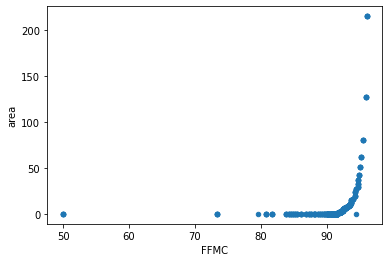

In [326]:
mydatabase.plot.scatter( x='FFMC' , y ='area')

# relationship btween area and DMC 


In [328]:
mydatabase['DMC'].corr(mydatabase['area'])
#there is a strong relationship 

0.6680236932089226

<AxesSubplot:xlabel='DMC', ylabel='area'>

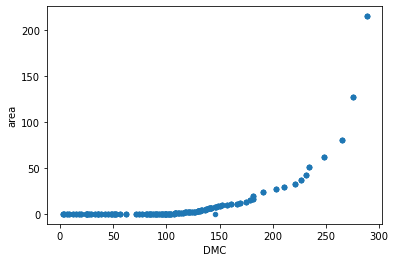

In [329]:
mydatabase.plot.scatter( x='DMC' , y ='area')

In [330]:
mydatabase['wind'].corr(mydatabase['area'])
#strong relationship

0.6626666703008576

<AxesSubplot:xlabel='wind', ylabel='area'>

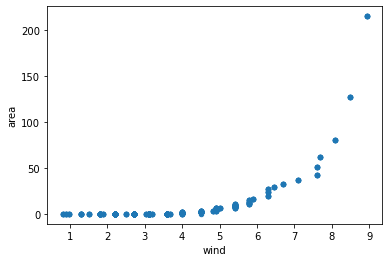

In [331]:
mydatabase.plot.scatter( x='wind' , y ='area')

In [342]:
mydatabase['rain'].corr(mydatabase['area'])
#very strong relation

0.781764306006696

<AxesSubplot:xlabel='rain', ylabel='area'>

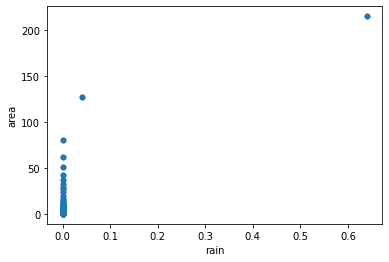

In [343]:
mydatabase.plot.scatter( x='rain' , y ='area')

In [344]:
mydatabase['DC'].corr(mydatabase['area'])


0.34467708777065653

<AxesSubplot:xlabel='DC', ylabel='area'>

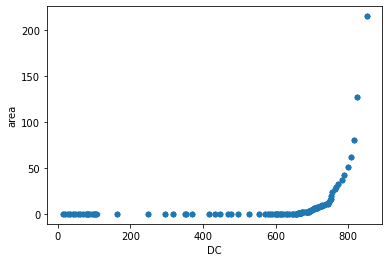

In [345]:
mydatabase.plot.scatter( x='DC' , y ='area')

In [346]:
mydatabase['ISI'].corr(mydatabase['area'])


0.679436853766688

<AxesSubplot:xlabel='ISI', ylabel='area'>

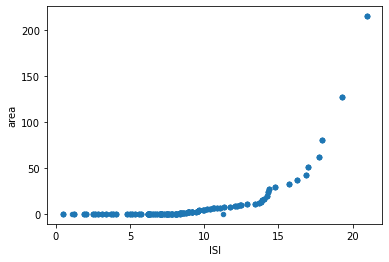

In [347]:
mydatabase.plot.scatter( x='ISI' , y ='area')

In [348]:
mydatabase['temp'].corr(mydatabase['area'])


0.5541960097502338

<AxesSubplot:xlabel='temp', ylabel='area'>

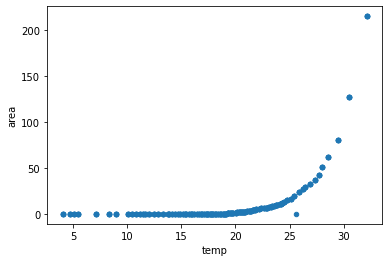

In [349]:
mydatabase.plot.scatter( x='temp' , y ='area')

In [351]:
mydatabase['RH'].corr(mydatabase['area'])


0.6984242276340387

<AxesSubplot:xlabel='RH', ylabel='area'>

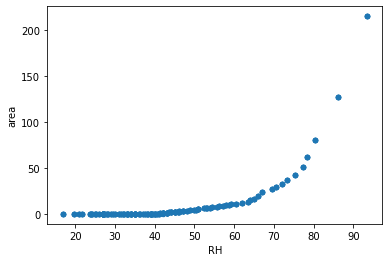

In [352]:
mydatabase.plot.scatter( x='RH' , y ='area')

In [354]:
mydatabase['X'].corr(mydatabase['area'])
#weak

-0.023323282352087096

<AxesSubplot:xlabel='X', ylabel='area'>

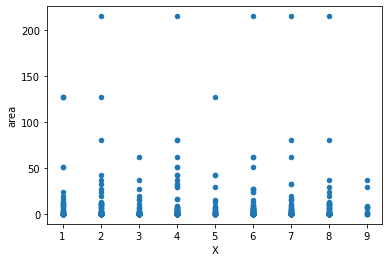

In [355]:
mydatabase.plot.scatter( x='X' , y ='area')

In [356]:
mydatabase['y'].corr(mydatabase['area'])


0.6282189999847765

<AxesSubplot:xlabel='y', ylabel='area'>

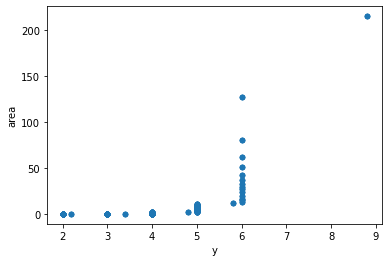

In [357]:
mydatabase.plot.scatter( x='y' , y ='area')